# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [115]:
17

17

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")
warnings.filterwarnings('ignore')
import time

In [ ]:
df = pd.read_csv('/content/sample_data/bank-additional-full.csv', sep = ';')

In [ ]:
df.head(   )


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [ ]:
df.info()

df = df.convert_dtypes()
df.info()
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
null_count = (df.isnull().sum())/len(df)
print('Number of null values:', null_count)

Number of null values: age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64


In [ ]:
for col in df:
    if df[col].dtype == 'string':
        #print(f"Unique value in '{col}':")
        #print(pd.unique(vehicle[col]))
        print(f"Count of unique values in '{col}': {len(pd.unique(df[col]))}")

Count of unique values in 'job': 12
Count of unique values in 'marital': 4
Count of unique values in 'education': 8
Count of unique values in 'default': 3
Count of unique values in 'housing': 3
Count of unique values in 'loan': 3
Count of unique values in 'contact': 2
Count of unique values in 'month': 10
Count of unique values in 'day_of_week': 5
Count of unique values in 'poutcome': 3
Count of unique values in 'y': 2


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [ ]:
!pip install category_encoders
import category_encoders as ce
from category_encoders.james_stein import JamesSteinEncoder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


In [ ]:
# Build the encoder
encoder = ce.JamesSteinEncoder(cols=['job', 'marital', 'education','default',	'housing'	,'loan',	'contact',	'month',	'day_of_week','poutcome','y'  ])

# Encode the frame and view it
df_tranformed = encoder.fit_transform(df, df['y'])

# Look at the first few rows
df_tranformed.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0.104908,0.103335,0.105970,0.12879,0.108796,0.113402,0.052313,0.078471,0.102596,...,1,999,0,0.088322,1.1,93.994,-36.4,4.857,5191.0,0.0
1,57,0.092330,0.103335,0.109864,0.05153,0.108796,0.113402,0.052313,0.078471,0.102596,...,1,999,0,0.088322,1.1,93.994,-36.4,4.857,5191.0,0.0
2,37,0.092330,0.103335,0.109864,0.12879,0.116194,0.113402,0.052313,0.078471,0.102596,...,1,999,0,0.088322,1.1,93.994,-36.4,4.857,5191.0,0.0
3,40,0.122317,0.103335,0.091426,0.12879,0.108796,0.113402,0.052313,0.078471,0.102596,...,1,999,0,0.088322,1.1,93.994,-36.4,4.857,5191.0,0.0
4,56,0.092330,0.103335,0.109864,0.12879,0.108796,0.109315,0.052313,0.078471,0.102596,...,1,999,0,0.088322,1.1,93.994,-36.4,4.857,5191.0,0.0


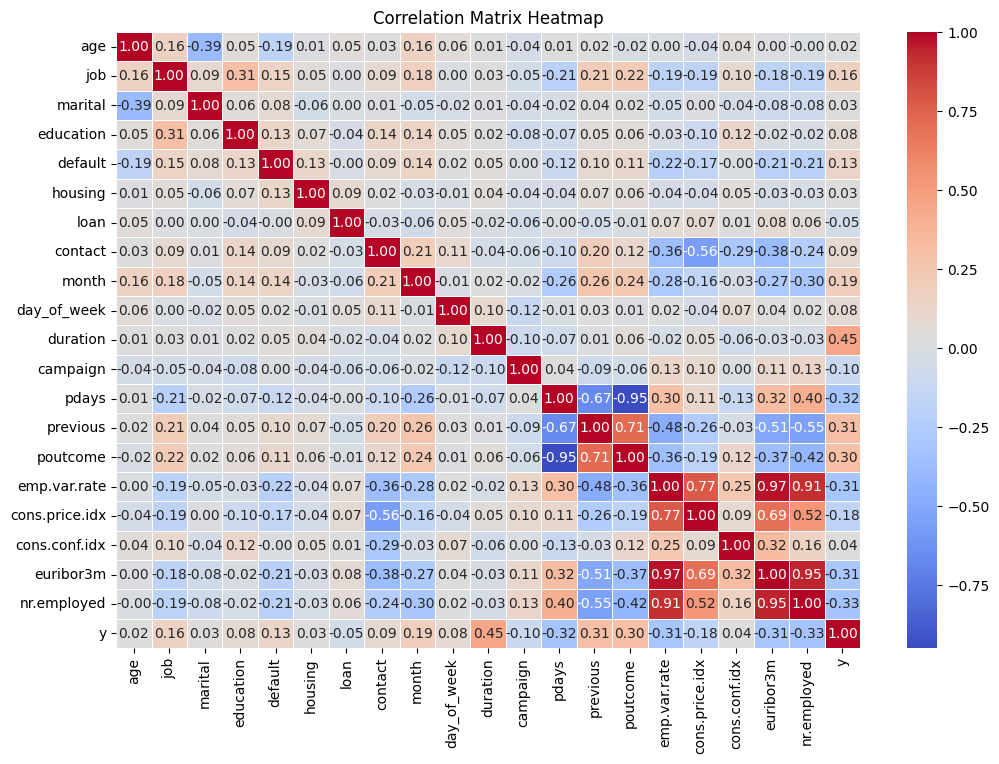

<Figure size 640x480 with 0 Axes>

In [ ]:
# Compute the correlation matrix
correlation_matrix = df_tranformed.sample(500).corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
plt.savefig('/content/sample_data/heatmap.png')

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [ ]:
y = df_tranformed['y']
X = df_tranformed.drop(columns=['y'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [ ]:
def evaluate_metrics(true_labels, predicted_labels, stime, etime, model):
    """
    This function takes true labels and predicted labels, and returns a dictionary
    with accuracy, precision, recall, and F1 score.

    Parameters:
    true_labels (list or array): Ground truth (correct) labels.
    predicted_labels (list or array): Predicted labels by the model.

    Returns:
    dict: Dictionary containing accuracy, precision, recall, and F1 score.
    """

    # Calculate each of the metrics
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='binary')  # Adjust the average type if it's multi-class
    recall = recall_score(true_labels, predicted_labels, average='binary')  # Adjust the average type if it's multi-class
    f1 = f1_score(true_labels, predicted_labels, average='binary')  # Adjust the average type if it's multi-class
    time = etime - stime

    # Return the results in a dictionary
    metrics = {
        'Model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'Time' : time
    }

    return metrics

In [ ]:
stime = time.time()
baseline = DummyClassifier(strategy='stratified').fit(X_train, y_train)
etime =  time.time()
baseline_predictions = baseline.predict(X_test)
baseline_accuracy = evaluate_metrics(baseline_predictions, y_test, stime, etime)
print(f'Baseline accuracy score: {baseline_accuracy}')

Baseline accuracy score: {'accuracy': 0.8023696222200641, 'precision': 0.11274934952298352, 'recall': 0.1138353765323993, 'f1_score': 0.11328976034858387, 'Time': 0.003927946090698242}


Since this is an imbalnce class, we will take F1 score as baseline which is around 11.79%, our models should perform better than this.

# check this one -DELETE

https://github.com/pratikbassi/comparingClassifiers/blob/main/prompt_III.ipynb

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [ ]:
stime = time.time()
knn_pipe = Pipeline([('scale', StandardScaler()),('KNN', KNeighborsClassifier(n_neighbors=1))]).fit(X_train,y_train)
etime =  time.time()
print(knn_pipe)
knn_score = evaluate_metrics(knn_pipe.predict(X_test),y_test, stime, etime, 'knn')
print(f'KNN accuracy score: {knn_score}')


Pipeline(steps=[('scale', StandardScaler()),
                ('KNN', KNeighborsClassifier(n_neighbors=1))])
KNN accuracy score: {'Model': 'knn', 'accuracy': 0.8803535010197144, 'precision': 0.44666088464874243, 'recall': 0.4643823264201984, 'f1_score': 0.45534924845269675, 'Time': 0.06846499443054199}


In [ ]:
stime = time.time()
lr_pipe = Pipeline([('scale', StandardScaler()),('lr', LogisticRegression(max_iter=10000))]).fit(X_train,y_train)
etime =  time.time()
print(lr_pipe)


lr_score = evaluate_metrics(lr_pipe.predict(X_test),y_test, stime, etime, 'lr')
print(f'KNN accuracy score: {lr_score}')

Pipeline(steps=[('scale', StandardScaler()),
                ('lr', LogisticRegression(max_iter=10000))])
KNN accuracy score: {'Model': 'lr', 'accuracy': 0.9111391667475964, 'precision': 0.40763226366001737, 'recall': 0.6695156695156695, 'f1_score': 0.5067385444743935, 'Time': 0.2260739803314209}


In [ ]:
stime = time.time()
dec_tree_pipe = Pipeline([('scale', StandardScaler()),('dec_tree', DecisionTreeClassifier(random_state=42))]).fit(X_train,y_train)
etime =  time.time()
print(dec_tree_pipe)


dt_score = evaluate_metrics(dec_tree_pipe.predict(X_test),y_test, stime, etime,'Dec_Tree')
print(f'KNN accuracy score: {dt_score}')

Pipeline(steps=[('scale', StandardScaler()),
                ('dec_tree', DecisionTreeClassifier(random_state=42))])
KNN accuracy score: {'Model': 'Dec_Tree', 'accuracy': 0.8864717878993882, 'precision': 0.5281873373807459, 'recall': 0.49351701782820095, 'f1_score': 0.5102639296187683, 'Time': 0.339702844619751}


In [ ]:
starttime = time.time()
SVC_pipe = Pipeline([('scale', StandardScaler()),('SVC', SVC())]).fit(X_train,y_train)
etime =  time.time()
print(SVC_pipe)



SVC_score = evaluate_metrics(SVC_pipe.predict(X_test),y_test, stime, etime,'SVC')
print(f'KNN accuracy score: {SVC_score}')

Pipeline(steps=[('scale', StandardScaler()), ('SVC', SVC())])
KNN accuracy score: {'Model': 'SVC', 'accuracy': 0.912013207730407, 'precision': 0.4163052905464007, 'recall': 0.6732117812061711, 'f1_score': 0.5144694533762058, 'Time': 31.031378507614136}


### Problem 9: Score the Model

What is the accuracy of your model?

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [ ]:
data = [knn_score,lr_score, dt_score, SVC_score]


output = pd.DataFrame(data)
output

,Model,accuracy,precision,recall,f1_score,Time
0,knn,0.880354,0.446661,0.464382,0.455349,0.068465
1,lr,0.911139,0.407632,0.669516,0.506739,0.226074
2,Dec_Tree,0.886472,0.528187,0.493517,0.510264,0.339703
3,SVC,0.912013,0.416305,0.673212,0.514469,31.031379


Running various models has improved the F1 score, but it is still around 51%, which is much better than the baseline. Now, let's work on improving the model and observe its effect on the F1 score.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [ ]:
poly_features = PolynomialFeatures(degree=3,include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

columns = poly_features.get_feature_names_out()
train_df = pd.DataFrame(X_train_poly, columns=columns)
test_df = pd.DataFrame(X_test_poly, columns=columns)
train_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.conf.idx^3,cons.conf.idx^2 euribor3m,cons.conf.idx^2 nr.employed,cons.conf.idx euribor3m^2,cons.conf.idx euribor3m nr.employed,cons.conf.idx nr.employed^2,euribor3m^3,euribor3m^2 nr.employed,euribor3m nr.employed^2,nr.employed^3
0,50.0,0.082929,0.103335,0.105970,0.05153,0.108081,0.108081,0.052313,0.078471,0.116488,...,-48228.544,6435.33072,6877867.360,-858.692344,-917741.80680,-9.808519e+08,114.578811,122458.020759,1.308791e+08,1.398792e+11
1,26.0,0.082929,0.135053,0.109864,0.12879,0.108796,0.113402,0.052313,0.078471,0.109208,...,-48228.544,6432.68080,6877867.360,-857.985310,-917363.90200,-9.808519e+08,114.437326,122357.190775,1.308252e+08,1.398792e+11
2,34.0,0.110027,0.103335,0.109864,0.12879,0.116194,0.113402,0.147376,0.108532,0.118987,...,-47045.881,6469.13444,6813312.201,-889.550786,-936877.61124,-9.867224e+08,122.319393,128827.159618,1.356812e+08,1.428998e+11
3,30.0,0.082929,0.135053,0.088548,0.12879,0.116194,0.113402,0.052313,0.078471,0.109208,...,-48228.544,6432.68080,6877867.360,-857.985310,-917363.90200,-9.808519e+08,114.437326,122357.190775,1.308252e+08,1.398792e+11
4,29.0,0.122317,0.135053,0.127721,0.12879,0.116194,0.113402,0.147376,0.105600,0.118987,...,-74088.000,7190.06400,9165391.200,-697.778592,-889479.39360,-1.133846e+09,67.717751,86321.857341,1.100371e+08,1.402676e+11


In [ ]:
selector = SequentialFeatureSelector(LinearRegression(),n_features_to_select=5)
best_features = selector.fit_transform(train_df, y_train)
best_features_df = pd.DataFrame(best_features, columns=selector.get_feature_names_out())

best_features_df.head()

,nr.employed,job duration pdays,contact month duration,month pdays euribor3m,pdays nr.employed^2
0,5191.0,12675.410840,0.628075,380.752016,2.691953e+10
1,5191.0,17646.160189,0.874379,380.595231,2.691953e+10
2,5228.1,9342.914033,1.359581,538.215712,2.730570e+10
3,5191.0,26676.354840,1.321831,380.595231,2.691953e+10
4,5195.8,41668.465529,5.306932,429.993431,2.696934e+10


In [ ]:
stime = time.time()
knn_pipe = Pipeline([('column_selector',selector),('KNN', KNeighborsClassifier(n_neighbors=1))]).fit(X_train,y_train)
etime =  time.time()
print(knn_pipe)
knn_score = evaluate_metrics(knn_pipe.predict(X_test),y_test, stime, etime, 'knn')
print(f'KNN accuracy score: {knn_score}')


Pipeline(steps=[('column_selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=5)),
                ('KNN', KNeighborsClassifier(n_neighbors=1))])
KNN accuracy score: {'Model': 'knn', 'accuracy': 0.8835583179566864, 'precision': 0.4822202948829141, 'recall': 0.48013816925734026, 'f1_score': 0.4811769796624838, 'Time': 6.819015026092529}


In [ ]:
stime = time.time()
knn_pipe = Pipeline([('column_selector',selector),('KNN', KNeighborsClassifier(n_neighbors=10))]).fit(X_train,y_train)
etime =  time.time()
print(knn_pipe)
knn_score = evaluate_metrics(knn_pipe.predict(X_test),y_test, stime, etime, 'knn')
print(f'KNN accuracy score: {knn_score}')

Pipeline(steps=[('column_selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=5)),
                ('KNN', KNeighborsClassifier(n_neighbors=10))])
KNN accuracy score: {'Model': 'knn', 'accuracy': 0.9090026221229485, 'precision': 0.419774501300954, 'recall': 0.6436170212765957, 'f1_score': 0.5081364829396325, 'Time': 4.422825336456299}


In [ ]:
stime = time.time()
lr_pipe = Pipeline([('column_selector',selector),('lr', LogisticRegression(max_iter=10000))]).fit(X_train,y_train)
etime =  time.time()
print(lr_pipe)


lr_score = evaluate_metrics(lr_pipe.predict(X_test),y_test, stime, etime, 'lr')
print(f'KNN accuracy score: {lr_score}')

Pipeline(steps=[('column_selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=5)),
                ('lr', LogisticRegression(max_iter=10000))])
KNN accuracy score: {'Model': 'lr', 'accuracy': 0.9096824317762455, 'precision': 0.39288811795316564, 'recall': 0.6632503660322109, 'f1_score': 0.4934640522875817, 'Time': 4.0725624561309814}


In [ ]:
stime = time.time()
dec_tree_pipe = Pipeline([('column_selector',selector),('scale', StandardScaler()),('dec_tree', DecisionTreeClassifier(random_state=42))]).fit(X_train,y_train)
etime =  time.time()
print(dec_tree_pipe)


dt_score = evaluate_metrics(dec_tree_pipe.predict(X_test),y_test, stime, etime,'Dec_Tree')
print(f'KNN accuracy score: {dt_score}')

Pipeline(steps=[('column_selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=5)),
                ('scale', StandardScaler()),
                ('dec_tree', DecisionTreeClassifier(random_state=42))])
KNN accuracy score: {'Model': 'Dec_Tree', 'accuracy': 0.8962804700398174, 'precision': 0.44666088464874243, 'recall': 0.544973544973545, 'f1_score': 0.4909437559580553, 'Time': 4.184178352355957}


In [ ]:
starttime = time.time()
SVC_pipe = Pipeline([('column_selector',selector),('scale', StandardScaler()),('SVC', SVC())]).fit(X_train,y_train)
etime =  time.time()
print(SVC_pipe)



SVC_score = evaluate_metrics(SVC_pipe.predict(X_test),y_test, stime, etime,'SVC')
print(f'KNN accuracy score: {SVC_score}')

Pipeline(steps=[('column_selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=5)),
                ('scale', StandardScaler()), ('SVC', SVC())])
KNN accuracy score: {'Model': 'SVC', 'accuracy': 0.9136641740312712, 'precision': 0.4588031222896791, 'recall': 0.6662468513853904, 'f1_score': 0.5434001027221366, 'Time': 64.30084609985352}


In [ ]:
data = [knn_score,lr_score, dt_score, SVC_score]


output = pd.DataFrame(data)
output

,Model,accuracy,precision,recall,f1_score,Time
0,knn,0.883558,0.482220,0.480138,0.481177,4.065438
1,lr,0.909682,0.392888,0.663250,0.493464,5.810719
2,Dec_Tree,0.896280,0.446661,0.544974,0.490944,4.184178
3,SVC,0.913664,0.458803,0.666247,0.543400,64.300846


In [ ]:
from sklearn.ensemble import RandomForestClassifier
starttime = time.time()
RFC = RandomForestClassifier(n_estimators=100, random_state=42)
RFC.fit(X_train,y_train)
etime =  time.time()
print(RFC)

RFC_score = evaluate_metrics(RFR.predict(X_test),y_test, stime, etime,'RFC')
print(f'RFR accuracy score: {RFR_score}')

RandomForestClassifier(random_state=42)
RFR accuracy score: {'Model': 'RFR', 'accuracy': 0.9150237933378654, 'precision': 0.5247181266261925, 'recall': 0.6491416309012875, 'f1_score': 0.580335731414868, 'Time': 1787.8046278953552}


In [ ]:
data = [knn_score,lr_score, dt_score, SVC_score, RFC_score]


output = pd.DataFrame(data)
output

,Model,accuracy,precision,recall,f1_score,Time
0,knn,0.909003,0.419775,0.643617,0.508136,4.422825
1,lr,0.909682,0.392888,0.663250,0.493464,4.072562
2,Dec_Tree,0.896280,0.446661,0.544974,0.490944,4.184178
3,SVC,0.913664,0.458803,0.666247,0.543400,1623.364196
4,RFC,0.915024,0.524718,0.649142,0.580336,1864.126277


##### Questions